In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings
import pickle
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

warnings.filterwarnings("ignore")

In [9]:
# We will time our model
start = time.time()
# Number of total classes
total_classes = 43

# Dimensions of our images
height = 32
width = 32
channels = 3

pickle_in = open("D:\Trafficsign/image_data.pickle","rb")
image_data = pickle.load(pickle_in)

pickle_in = open("D:\Trafficsign/image_labels.pickle","rb")
image_labels = pickle.load(pickle_in)

In [10]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [11]:
# Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

# The dimensions concur
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [13]:
# Converting the labels into one hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, total_classes)
y_valid = tensorflow.keras.utils.to_categorical(y_valid, total_classes)

# The dimensions concur
print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [15]:
tensorflow.keras.backend.clear_session() # Clearing previous session if there was any
np.random.seed(2666)

In [17]:
model = tensorflow.keras.models.load_model(r'D:\Trafficsign\traffic_Sign2')

In [18]:
# Testing accuracy on the reserved test set
test = pd.read_csv('D:\Trafficsign/archive/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
5


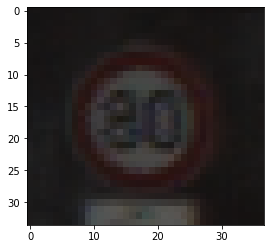

In [19]:
input_path='D:\Trafficsign/archive/'
# How an image looks like
img_index = 56
image = Image.open(input_path + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

In [20]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

In [25]:
pred = model.predict_classes(img)[0]
print(pred)

sign = classes[pred]
print(sign)

5
Speed limit (80km/h)


In [27]:
pickle_in = open('D:\Trafficsign/X_test.pickle',"rb")
X_test = pickle.load(pickle_in)


In [28]:
# Prediction of test set
pred = model.predict_classes(X_test)

#Accuracy with the test data
print("Accuracy score = %",100*accuracy_score(labels, pred))
end = time.time()
print("Time taken: ", round(end-start,5), "seconds")

Accuracy score = % 95.86698337292161
Time taken:  396.82605 seconds
